# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.114564e+01     7.167906e+00
 * time: 0.004090070724487305
     1     2.939694e+01     5.743626e+00
 * time: 0.012241125106811523
     2     1.656609e+01     3.825051e+00
 * time: 0.035790205001831055
     3     1.284049e+01     1.774103e+00
 * time: 0.05527615547180176
     4     1.131174e+01     1.344111e+00
 * time: 0.07500100135803223
     5     1.051523e+01     8.479169e-01
 * time: 0.09088516235351562
     6     1.000994e+01     1.327360e+00
 * time: 0.10642313957214355
     7     9.508029e+00     6.795850e-01
 * time: 0.12232708930969238
     8     9.235900e+00     7.570075e-01
 * time: 0.13793015480041504
     9     9.115730e+00     5.670894e-01
 * time: 0.22670507431030273
    10     9.005236e+00     3.564297e-01
 * time: 0.24217009544372559
    11     8.979063e+00     1.056003e+00
 * time: 0.2535719871520996
    12     8.884451e+00     7.495708e-01
 * time: 0.26516008377075195
    13     8.789446e+00     5.693566e-01
 * tim

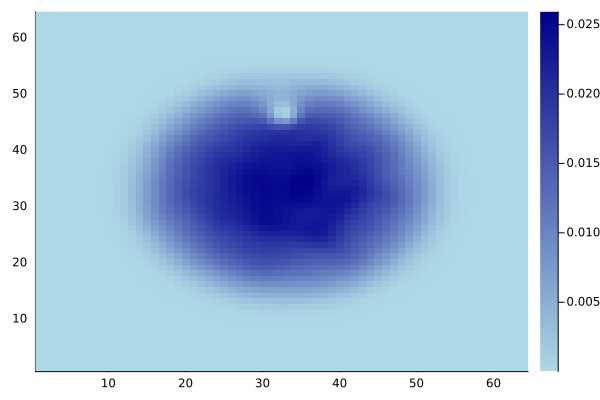

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)